# M06-DTree

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
heart = pd.read_csv("heart.csv")

In [3]:
nvpairsdf3 = heart.nunique().reset_index().rename(columns={"index":"cname", 0:"uvalfreq"})
nvpairsdf3

,cname,uvalfreq
0,age,41
1,sex,2
2,cp,4
3,trestbps,49
4,chol,152
5,fbs,2
6,restecg,3
7,thalach,91
8,exang,2
9,oldpeak,40


In [4]:
def categorical_features(dset):
    ncol = len(dset.columns)
    is_categorical = dset.nunique() <= ncol
    return dset.iloc[:, is_categorical.values]

X = categorical_features(heart)

In [5]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
X.shape

(303, 9)

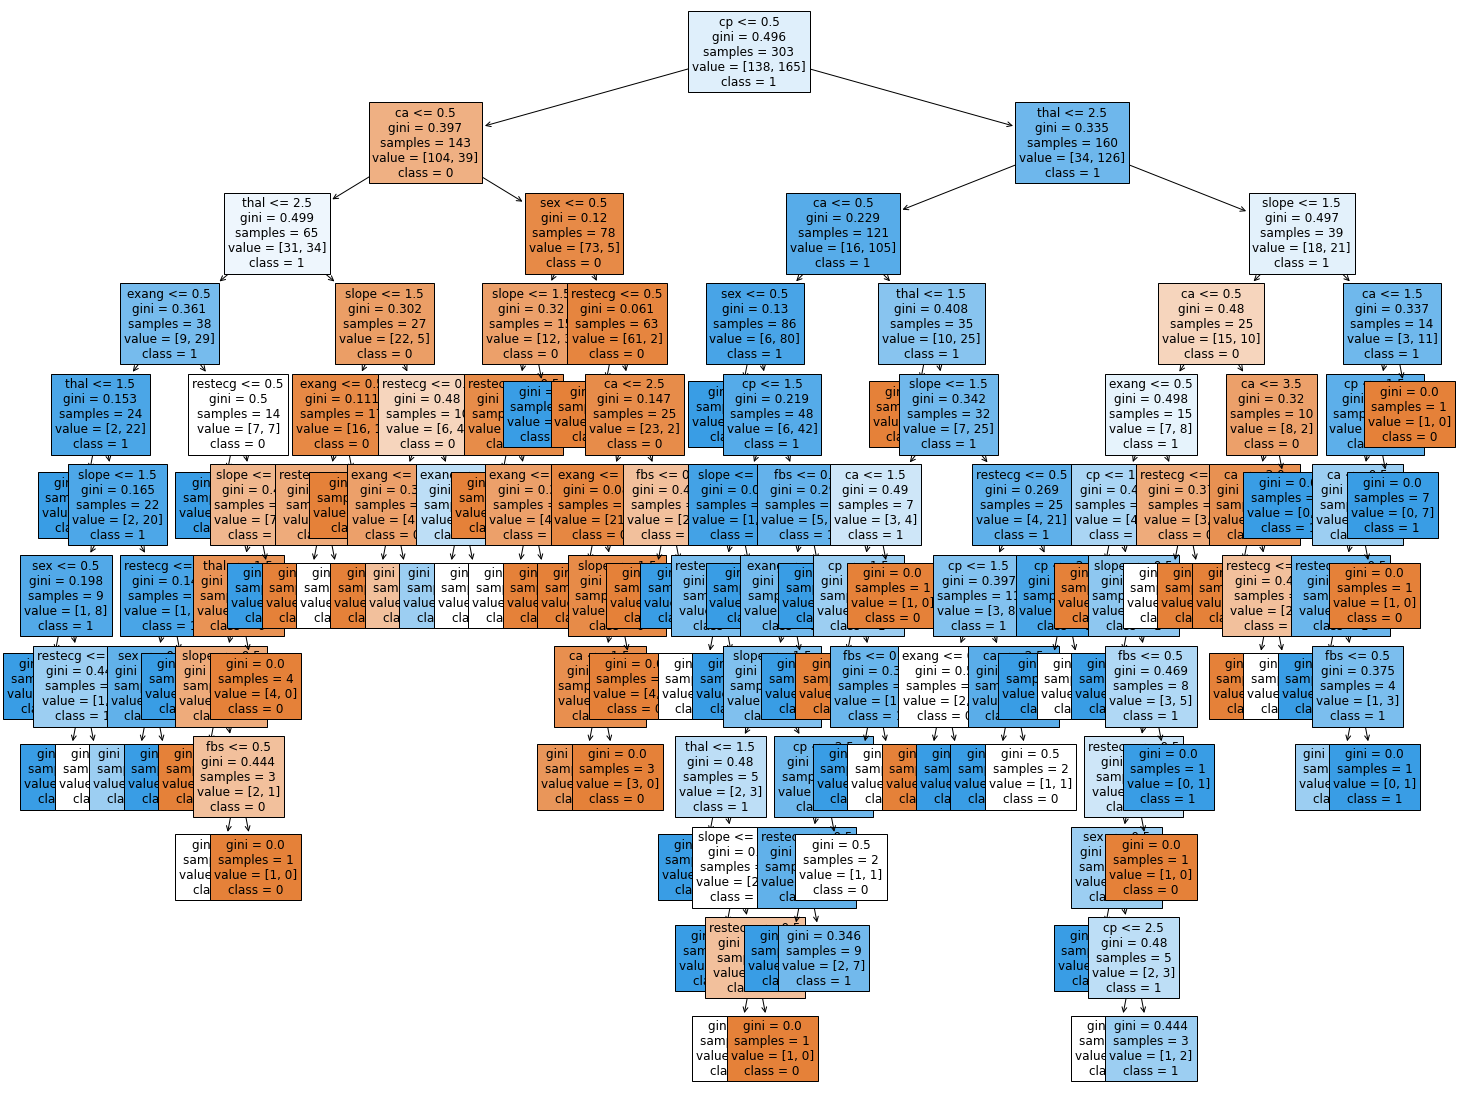

In [7]:
y_train = X["target"]
X_train = X.drop("target", 1)
dtree_model = DecisionTreeClassifier(min_samples_split=3, random_state=0)
dtree_model.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
fn = list(X.columns)
cn = ["0", "1"]
_ = plot_tree(dtree_model,  feature_names = fn, class_names=cn, filled = True, fontsize=12)
plt.show()